# Practica 5

Carlos Saiz Hernández

## Imports

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

## Variables gobales

In [72]:
PATH="./football.net"

## 1 Red de football

Pasos a seguir
- Lectura del archivo .net
- Creación del grafo modificando el tamaño según el arco

### Lectura del archivo .net

Leeremos el archivo .net y crearemos 2 listas, una con los nodos, y otra con los arcos y sus pesos correspondientes.
Si se desean cambiar los datos del archivo .net hay que tener en cuenta que la estructuración de dicho archivo ha de ser idéntica a la original, ya que de lo contrario la función podría no ejecutarse de forma correcta

In [73]:
def leerArchivo(path):
    lineas=[]
    nodos=[]
    nodos_grafo=[]
    arcos=[]
    print("Leyendo archivo...")
    print("Este proceso puede tardar un poco, por favor espere...")
    with open(path, 'r') as file:
        filas_archivo=(file.readlines())
        for fila in filas_archivo:
            lineas.append(fila.split())
        
    comprobante_nodos=False
    comprobante_arcos=False
    for linea in lineas:
        if linea[0]=="*Vertices":
            comprobante_nodos=True
            comprobante_arcos=False
            continue
        elif linea[0]=="*Arcs":
            comprobante_arcos=True
            comprobante_nodos=False
            continue
        elif linea[0]=="*Edges":
            comprobante_arcos=False
            comprobante_nodos=False
            continue    
        elif comprobante_nodos:
            nodos.append((linea[0], linea[1]))
            nodos_grafo.append(linea[1]) # Una segunda lista para los nodos, pero solo con los nombres
        elif comprobante_arcos:
            nodo1=''
            nodo2=''
            for nodo in nodos:
                if linea[0]==nodo[0]:
                    nodo1=nodo[1]
                if linea[1]==nodo[0]:
                    nodo2=nodo[1]
            arcos.append((nodo1, nodo2, linea[2]))    
    print("Archivo leido con exito")
    return nodos_grafo, arcos
    

### Creación del grafo

In [74]:
def grafo(nodos, arcos):
    G = nx.DiGraph()
    G.add_nodes_from(nodos)
    G.add_weighted_edges_from(arcos)
    return G

def dibujarGrafoP1(grafo, grado, intermediacion):
    print('\nImprimimos el grafo')

    plt.figure(figsize=(15, 10))
    pos = nx.circular_layout(G)  # Posicionamiento de los nodos
    # Tamaño de los nodos basado en la centralidad de grado
    node_size = [v * 10000 for v in grado.values()]
    # Color de los nodos basado en la centralidad de intermediación
    node_color = [intermediacion[n] for n in G.nodes()]     

    # Dibujar nodos y arcos
    nx.draw_networkx_nodes(G, pos, node_size=node_size,node_color=node_color, cmap=plt.cm.Blues, edgecolors='black')
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos)
    plt.title("Red Football98")
    plt.axis('off')
    plt.show()

### Calcular las métricas

In [75]:
def calcular_hubs_autoridades(G):
    hubs, autoridades = nx.hits(G)
    return hubs, autoridades

In [76]:
def metricas(G):
    centralidad_grado = nx.degree_centrality(G)
    centralidad_intermediacion = nx.betweenness_centrality(G)
    centralidad_cercania = nx.closeness_centrality(G)
    metrica_hubs, metrica_autoridad = calcular_hubs_autoridades(G)
    return centralidad_grado, centralidad_intermediacion, metrica_hubs, metrica_autoridad

def ordenar_nodos(hubs, autoridades, nodos):
    nodos_hub=[]
    nodos_autoridades=[]
    for nodo in nodos:
        hub = hubs[nodo]
        autority = autoridades[nodo]
        if hub < autority:
            nodos_autoridades.append(nodo)
        else:
            nodos_hub.append(nodo)
            
    if nodosAutority is None or nodosHub is None:
        return None, None
    return nodos_autoridades, nodos_hub
        
def imprimirNodos(hubs, autoridades):
    print('Nodos Hubs:')
    for hub in hubs:
        print(hub)
    print('Nodos Autoridades:')
    for aut in autoridades:
        print(aut)

### Main

Leyendo archivo...
Este proceso puede tardar un poco, por favor espere...
Archivo leido con exito
Nodos Hubs:
"ARG"
"AUT"
"BEL"
"BGR"
"BRA"
"CHL"
"CMR"
"COL"
"DNK"
"HRV"
"IRN"
"JAM"
"KOR"
"MAR"
"NGA"
"NLD"
"NOR"
"PRY"
"ROM"
"SCO"
"TUN"
"USA"
"YUG"
"ZAF"
Nodos Autoridades:
"CHE"
"DEU"
"ESP"
"FRA"
"GBR"
"GRE"
"ITA"
"JPN"
"MEX"
"PRT"
"TUR"

Imprimimos el grafo


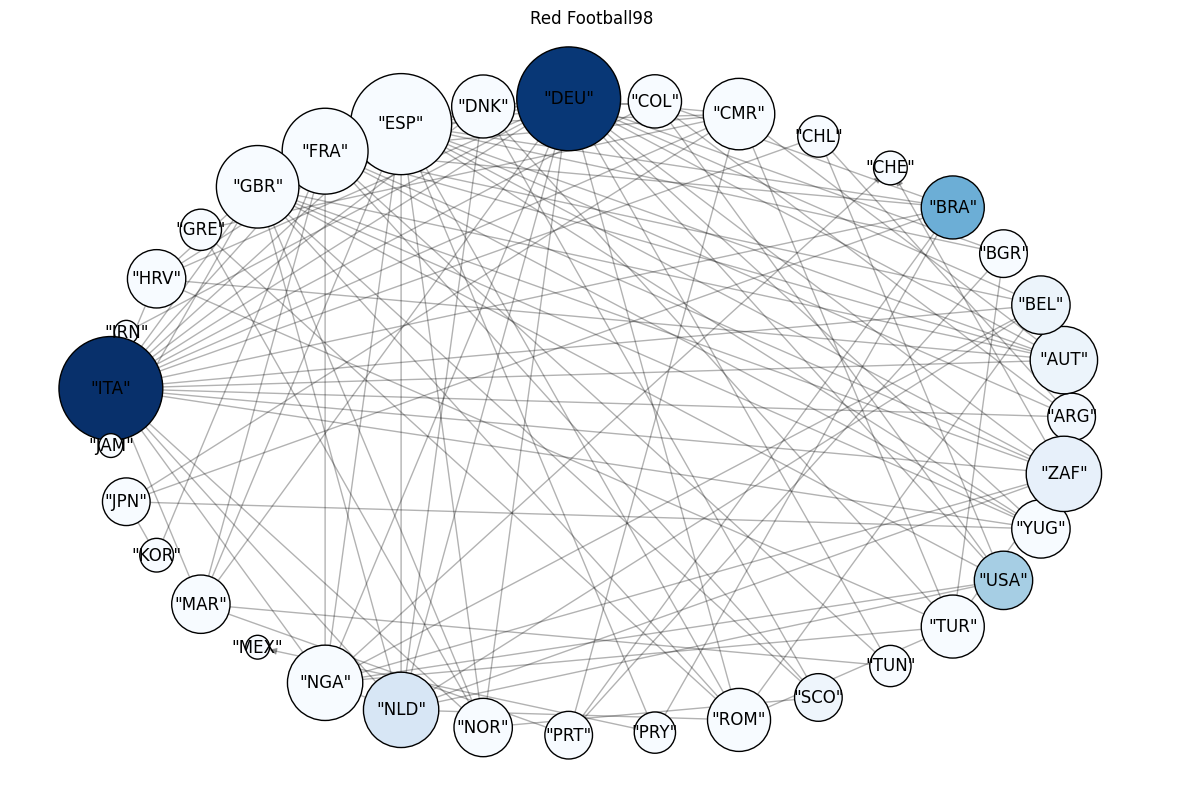

In [77]:
nodos, arcos=leerArchivo(PATH)
G = grafo(nodos, arcos)
grado, intermediacion, hubs, autoridades=metricas(G)
nodosAutority=[]
nodosHub=[]
nodosAutority, nodosHub = ordenar_nodos(hubs, autoridades, nodos)
imprimirNodos(nodosHub, nodosAutority)
dibujarGrafoP1(G, grado, intermediacion)


## Practica 2

### Creación del grafo

In [78]:
G = nx.florentine_families_graph()
def configurarGrafo(G, intermediacion, cercania):
    plt.figure(figsize=(10, 10))
    pos = nx.circular_layout(G)
    pos1 = nx.spring_layout(G)

    # Ajustar el tamaño y el color de los nodos según la centralidad de intermediación
    node_size_bt = [intermediacion[nodo] * 5000 for nodo in G.nodes]
    node_color_bt = [intermediacion[nodo] for nodo in G.nodes]
    node_size_ce = [cercania[nodo] * 5000 for nodo in G.nodes]
    node_color_ce = [cercania[nodo] for nodo in G.nodes]

    dibujarGrafo(G, node_size_bt, node_color_bt, pos1)
    dibujarGrafo(G, node_size_ce, node_color_ce, pos)

def dibujarGrafo(G, size, color, pos):

    nx.draw_networkx_nodes(G, pos, node_size=size, node_color=color, cmap='viridis')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    plt.show()

### Calculas las métricas 

In [79]:
def calcular_metricas(G):
    intermediacion = nx.betweenness_centrality(G)
    cercania = nx.closeness_centrality(G)

    return intermediacion, cercania

### Main

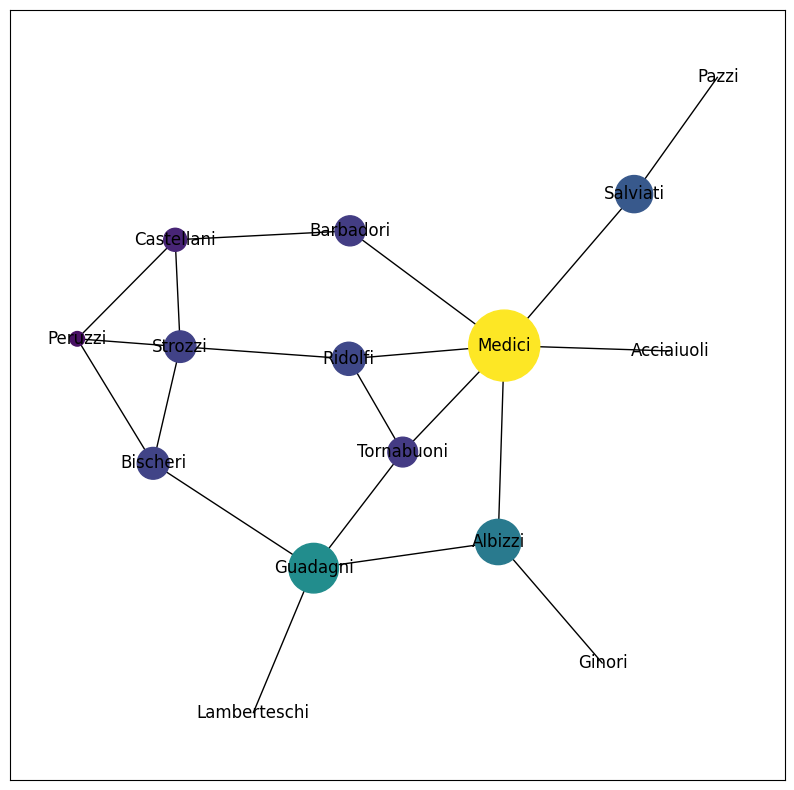

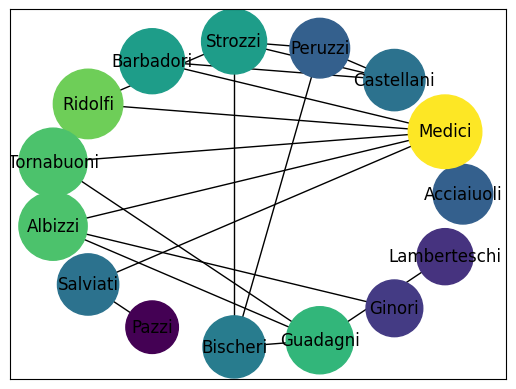

In [80]:
intermediacion, cercania = calcular_metricas(G)

configurarGrafo(G, intermediacion, cercania)
